In [335]:
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv('../Data/macrodata.csv', index_col=0, parse_dates=True)

In [336]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


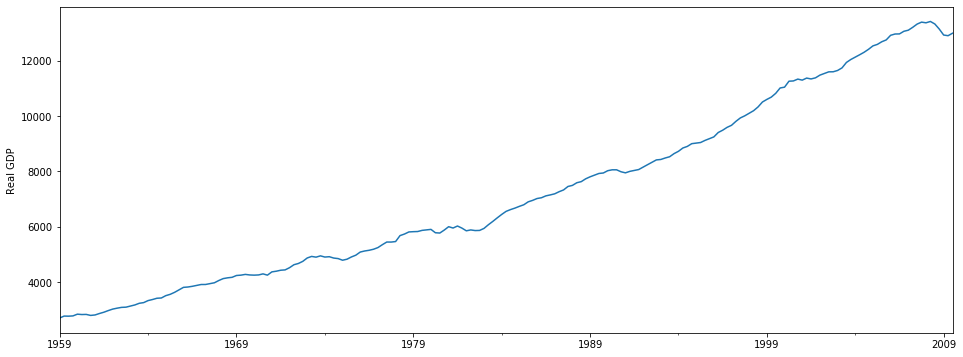

In [341]:
ax = df.realgdp.plot(figsize=(16, 6));
ax.autoscale(axis='x', tight=True)
ax.set(ylabel='Real GDP');

In [342]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Tuple unpacking
gdp_cycle, gdp_trend = hpfilter(df.realgdp, lamb=1600)

In [345]:
df['trend'] = gdp_trend

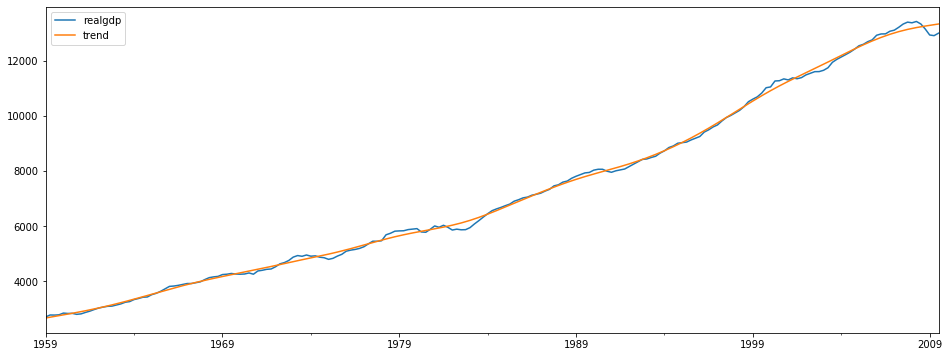

In [347]:
df[['realgdp', 'trend']].plot(figsize=(16, 6)).autoscale(axis='x', tight=True);

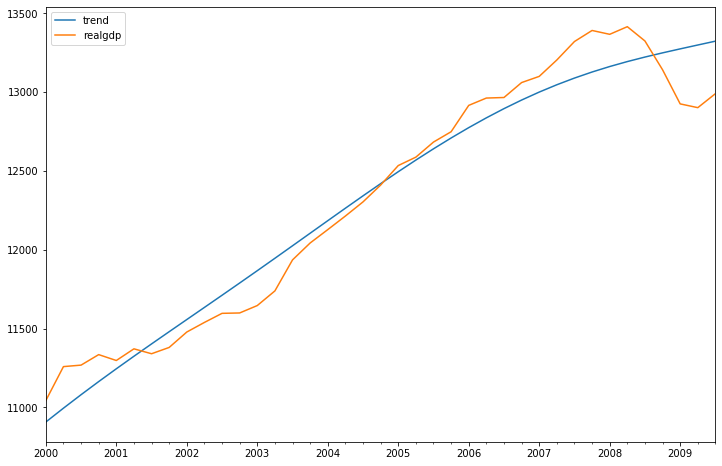

In [348]:
df[['trend', 'realgdp']]['2000-03-31':].plot(figsize=(12, 8)).autoscale(axis='x', tight=True);

In [349]:
airline = pd.read_csv('../Data/airline_passengers.csv', index_col='Month', parse_dates=True)

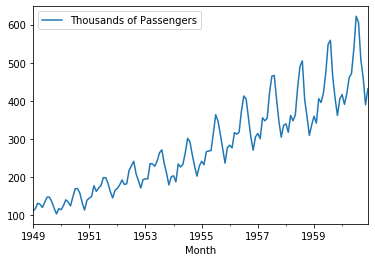

In [353]:
airline.plot();

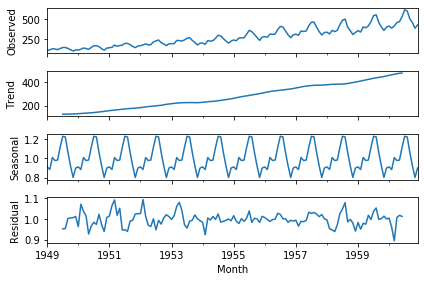

In [354]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(airline['Thousands of Passengers'], model='mul')

result.plot();

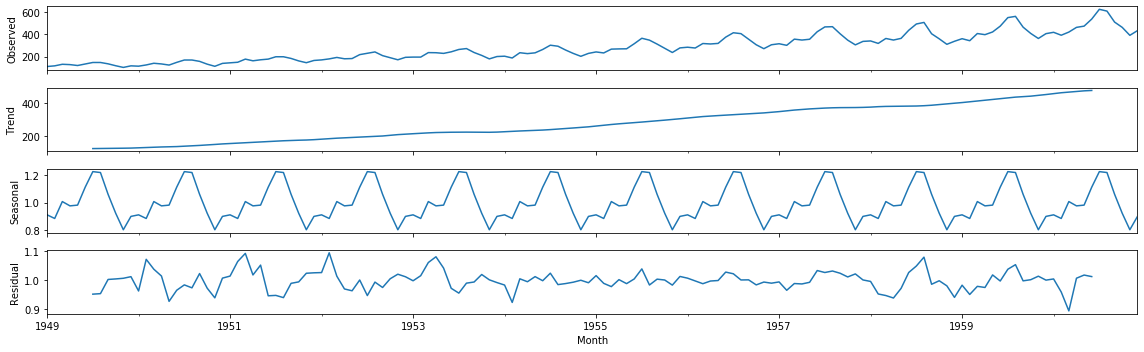

In [361]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 16, 5

result.plot();

In [362]:
airline['6-month-SMA']  = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [364]:
airline.sample(5)

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1960-07-01,622,483.333333,459.416667
1954-11-01,203,258.333333,236.583333
1954-01-01,204,217.500000,225.666667
1957-09-01,404,410.166667,359.666667
1956-06-01,374,313.833333,307.916667


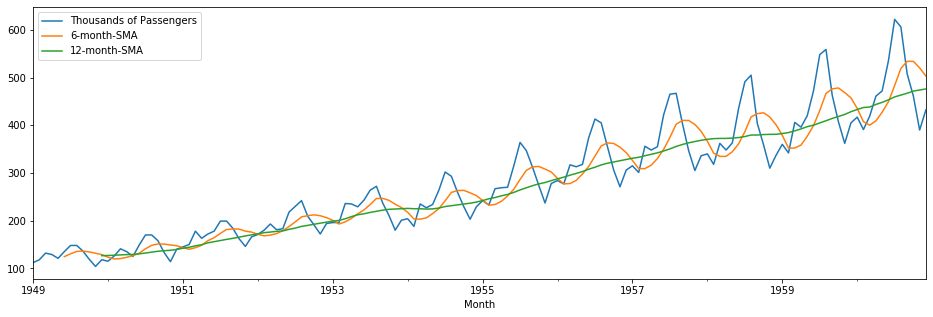

In [365]:
airline.plot();

In [366]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12, adjust=False).mean()

In [367]:
airline.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12
Month,,,,
1949-01-01,112,NaN,NaN,112.000000
1949-02-01,118,NaN,NaN,112.923077
1949-03-01,132,NaN,NaN,115.857988
1949-04-01,129,NaN,NaN,117.879836
1949-05-01,121,NaN,NaN,118.359861


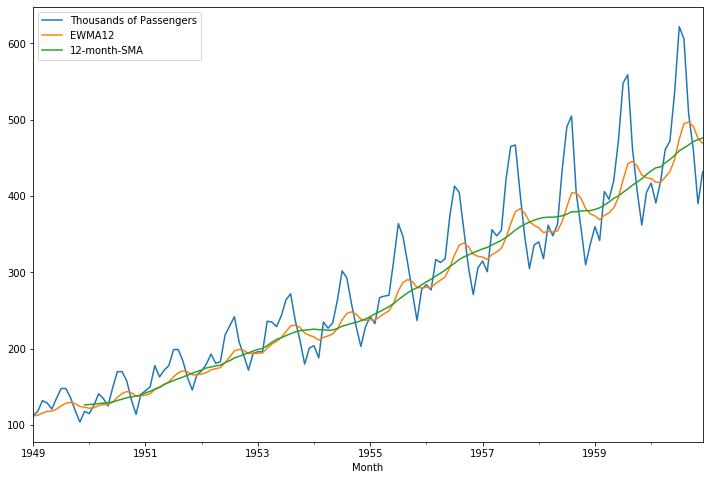

In [368]:
airline[['Thousands of Passengers', 'EWMA12', '12-month-SMA']].plot(figsize=(12, 8)).autoscale(axis='x', tight=True);